# ImageNet1000图像分类-单张图像预测

同济子豪兄 2023-6-25

## 导入工具包

In [22]:
import cv2
from cvs import *

import numpy as np

import aidlite_gpu

import matplotlib.pyplot as plt
%matplotlib inline

## 加载TFLite模型

In [2]:
model_path = 'ckpt/resnet18_imagenet.tflite'

NUM_CLASS = 1000 # 指定类别个数

In [3]:
aidlite = aidlite_gpu.aidlite()

# 模型路径 输入维度 输出维度 线程数 是否开启NNAPI
# https://docs.aidlux.com/#/intro/ai/ai-aidlite?id=_4fast_annmodel
aidlite.FAST_ANNModel(model_path, [256*256*3*4], [NUM_CLASS*4], 4, 0)

[2023-06-25 14:57:52,196224][/tmp/ipykernel_9675/2808051052.py:1 <module>][DEBUG]:=======init


Result(id=1, result='load model ok!', error=None)

## 载入图像

In [4]:
img_path = 'test_img/cat1.jpg'

In [5]:
img_bgr = cv2.imread(img_path)

In [6]:
img_bgr.shape

(800, 600, 3)

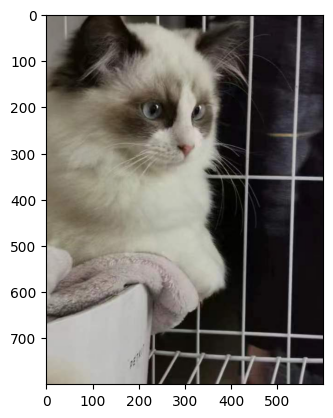

In [7]:
plt.imshow(img_bgr[:,:,::-1])
plt.show()

## 图像预处理

In [8]:
# 尺寸缩放
img_tensor = cv2.resize(img_bgr, (256, 256))

# 三通道的均值
mean = (0.485, 0.456, 0.406)

# 三通道的标准差
std = (0.229, 0.224, 0.225)

# 归一化
img_tensor = ((img_tensor / 255) - mean) / std
img_tensor = img_tensor.astype('float32')

## 推理预测

In [9]:
# 装填数据
aidlite.setInput_Float32(img_tensor)

Result(id=91, result=None, error=None)

In [10]:
# 推理预测
aidlite.invoke() 

Result(id=91, result=None, error=None)

In [11]:
# 获得推理预测结果
result = aidlite.getOutput_Float32()

## 解析预测结果

In [12]:
result.shape

(1000,)

In [13]:
# # 每个类别的 logit 分数（非置信度）
# result

In [14]:
# 置信度最高类别 ID
pred_id = np.argmax(result)

In [15]:
pred_id

284

## 载入类别名称与ID映射表

In [16]:
# 英文类别名称
idx_to_labels = np.load('data_meta/imagenet1000_idx_to_labels_en.npy', allow_pickle=True).item()

# 中文类别名称
# idx_to_labels = np.load('data_meta/imagenet1000_idx_to_labels_zh.npy', allow_pickle=True).item()

In [17]:
pred_class = idx_to_labels[pred_id]

In [18]:
pred_class

'Siamese_cat'

## 将预测类别名称写在图片上

In [25]:
# 图片，字符串，左上角坐标，字体，字体大小，颜色，字体粗细
img_output = cv2.putText(img_bgr, pred_class, (50, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 255), 2)

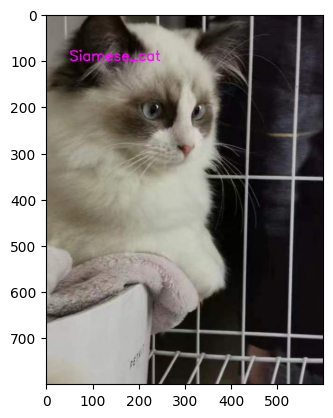

In [26]:
plt.imshow(img_output[:,:,::-1])
plt.show()

## 将预测结果显示在手机屏幕上

In [27]:
cvs.imshow(img_output)